In [2]:
#import required packages
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats

#see the info
df = pd.read_csv('medical_raw_data.csv')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [3]:
#Visually inspect df to facilitate exploration, spot problems
pd.set_option("display.max_columns", None)
df

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",NaN,25.0,Bachelor's Degree,Student,45967.61,Widowed,Male,No,16.481612,4,2,1,No,Emergency Admission,Yes,No,Medium,NaN,No,No,No,No,1.0,No,Yes,No,Intravenous,51.561217,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9996,9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4.0,87.0,Regular High School Diploma,Full Time,14983.02,Widowed,Male,Yes,18.451601,5,0,0,No,Elective Admission,Yes,No,Medium,1.0,Yes,Yes,No,No,0.0,No,No,Yes,CT Scan,68.668237,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9997,9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3.0,NaN,Regular High School Diploma,Full Time,65917.81,Separated,Female,Yes,15.752751,4,2,0,Yes,Elective Admission,Yes,No,High,1.0,No,No,No,No,1.0,Yes,No,No,Intravenous,NaN,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9998,9999,9999,E344109

In [4]:
#detection of duplicates True is missing value detected
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
#count True and False together
print(df.duplicated().value_counts())


False    10000
Name: count, dtype: int64


In [6]:
#detect missing values
df.isnull().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

In [7]:
#import missingno to visualize missing data 
!pip install missingno

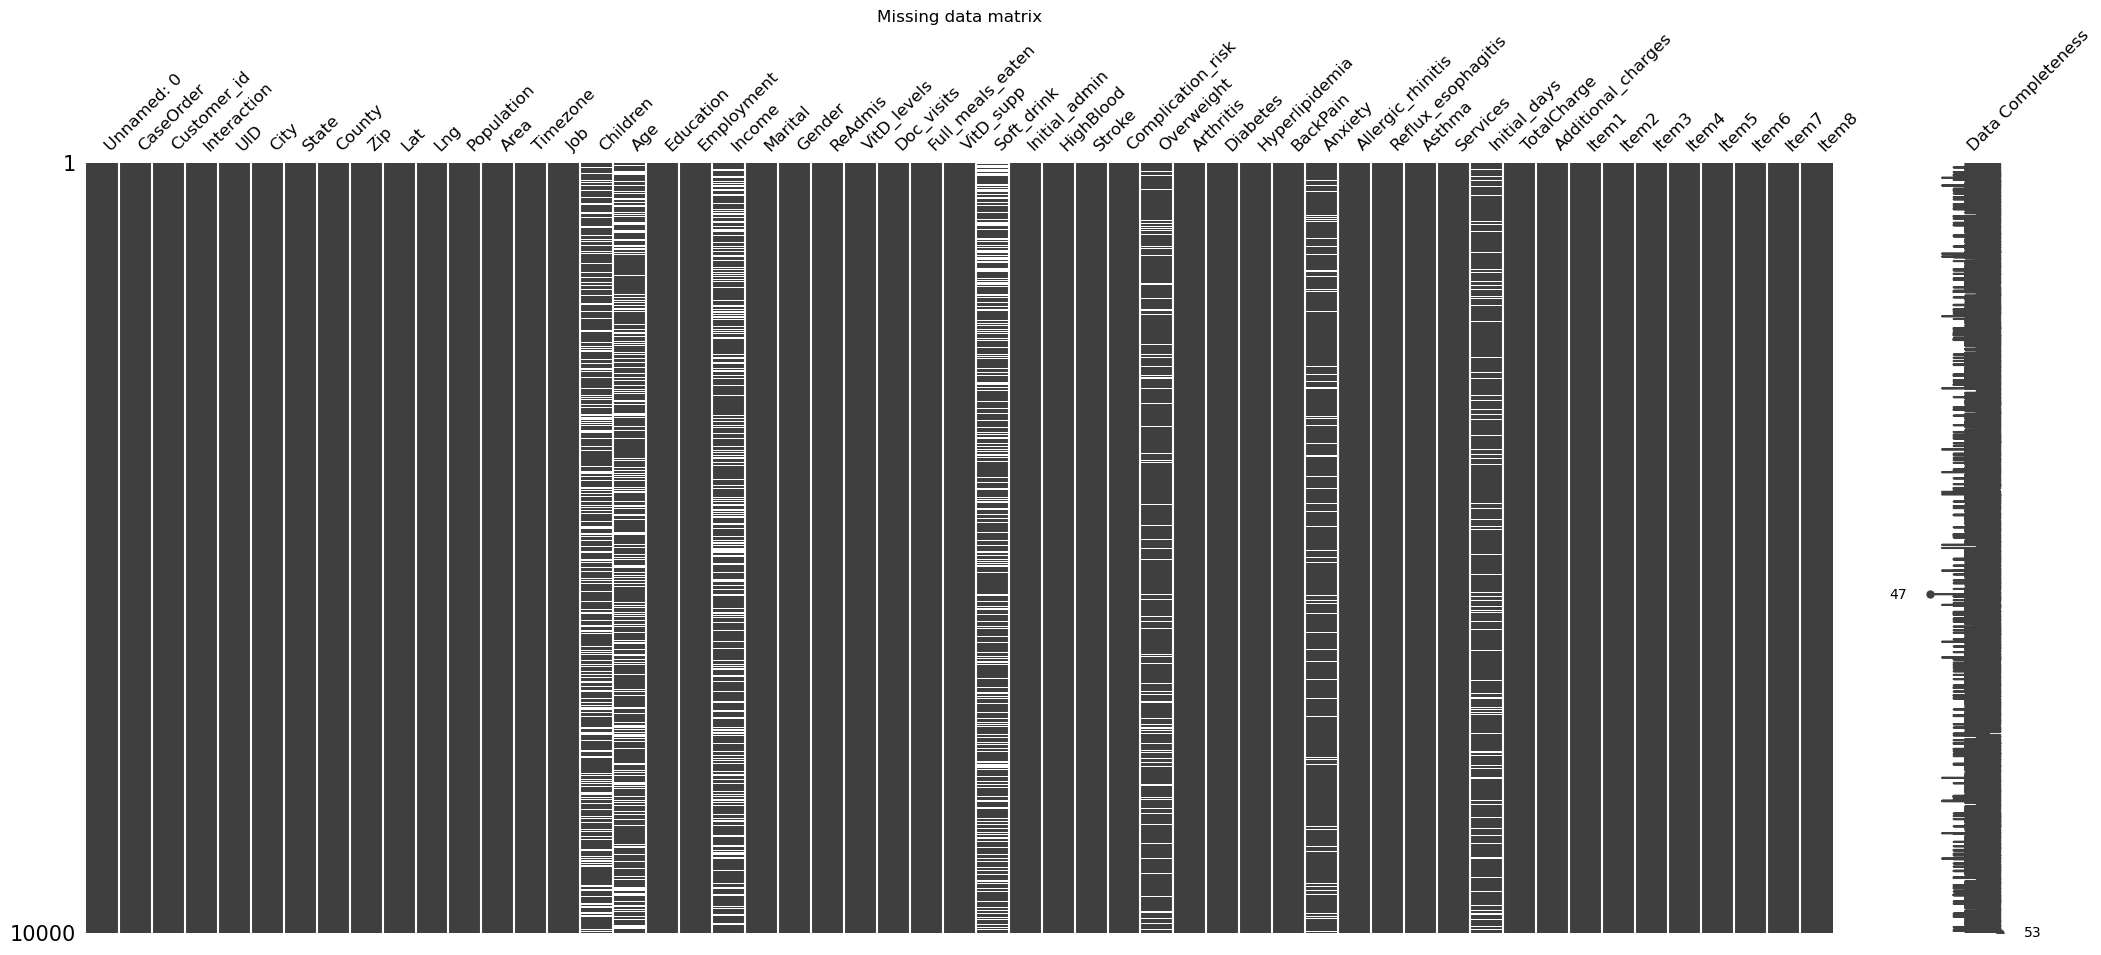

In [8]:
#Visualizing the dataset with missingno
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df, fontsize = 12, labels=True)
plt.title('Missing data matrix')
plt.show()

In [9]:
#selecting columns with null for cleaning 
df_null = df[['Children','Age','Income','Soft_drink','Overweight','Anxiety','Initial_days']]
df_null.head()

,Children,Age,Income,Soft_drink,Overweight,Anxiety,Initial_days
0,1.0,53.0,86575.93,NaN,0.0,1.0,10.585770
1,3.0,51.0,46805.99,No,1.0,NaN,15.129562
2,3.0,53.0,14370.14,No,1.0,NaN,4.772177
3,0.0,78.0,39741.49,No,0.0,NaN,1.714879
4,NaN,22.0,1209.56,Yes,0.0,0.0,1.254807


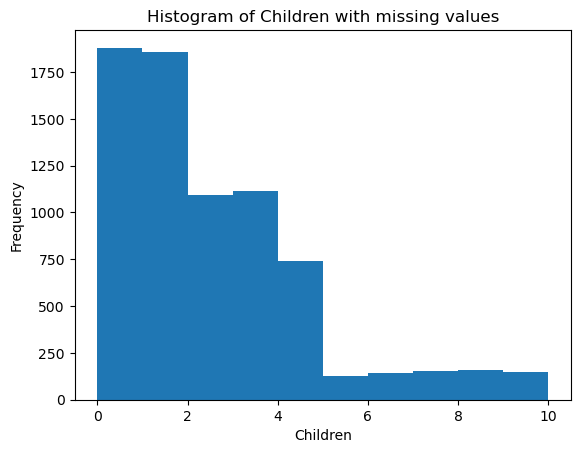

In [10]:
#create a histogram to examine distribution for Children
plt.hist(df['Children'])
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.title('Histogram of Children with missing values')
plt.show()

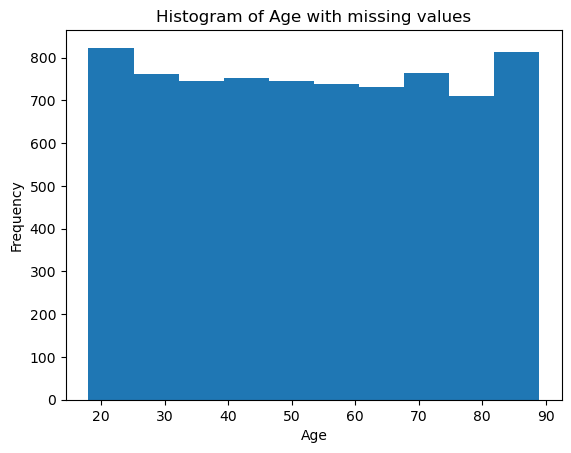

In [11]:
#create a histogram to examine distribution for Age
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age with missing values')
plt.show()

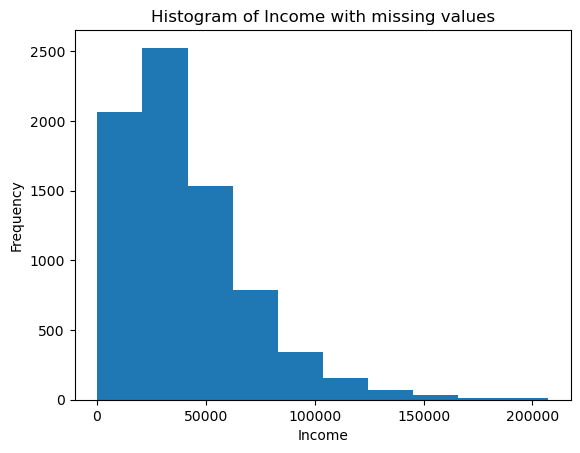

In [12]:
#create a histogram to examine distribution for Income
plt.hist(df['Income'])
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income with missing values')
plt.show()

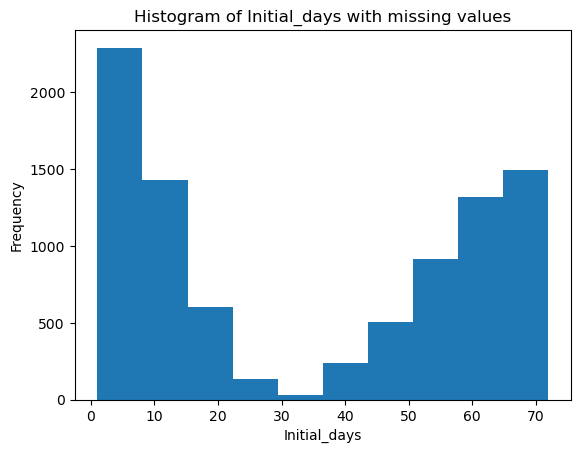

In [13]:
#create a histogram to examine distribution for Initial_days
plt.hist(df['Initial_days'])
plt.xlabel('Initial_days')
plt.ylabel('Frequency')
plt.title('Histogram of Initial_days with missing values')
plt.show()

In [14]:
#perform univariate imputation
#for Children, Initial_days, and Income with median
df['Children'] = df['Children'].fillna(df['Children'].median())
df['Initial_days'] = df['Initial_days'].fillna(df['Initial_days'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())

#for Age with mean
df['Age'] = df['Age'].fillna(df['Age'].mean()) 

##for Overweight, Anxiety, and Soft_drinks with mode
df['Overweight'] = df['Overweight'].fillna(df['Overweight'].mode()[0])
df['Anxiety'] = df['Anxiety'].fillna(df['Anxiety'].mode()[0])
df['Soft_drink'] = df['Soft_drink'].fillna(df['Soft_drink'].mode()[0])

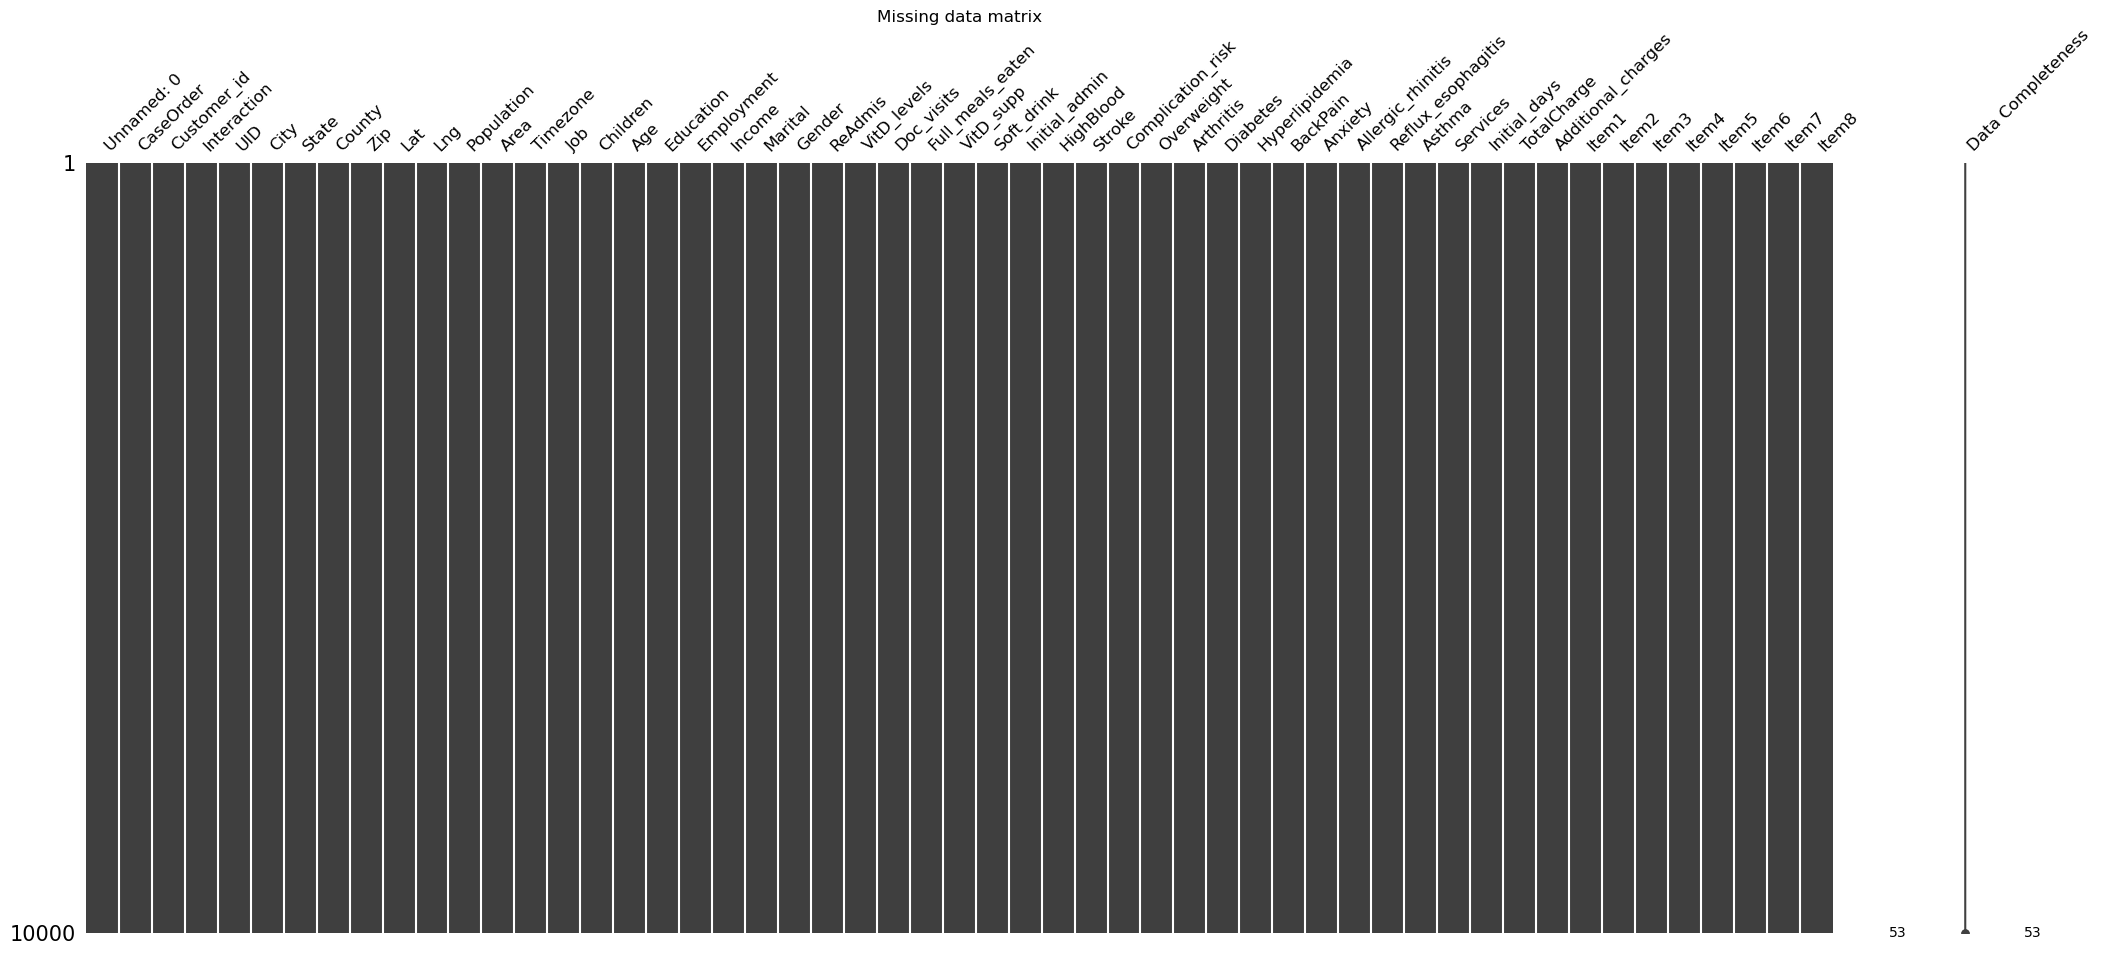

In [15]:
#Visualizing the dataset with missingno after univariate imputations performed
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df, fontsize = 12, labels=True)
plt.title('Missing data matrix')
plt.show()

In [16]:
#verify all nulls are filled
df.isnull().any()

Unnamed: 0            False
CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
Timezone              False
Job                   False
Children              False
Age                   False
Education             False
Employment            False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
VitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia      

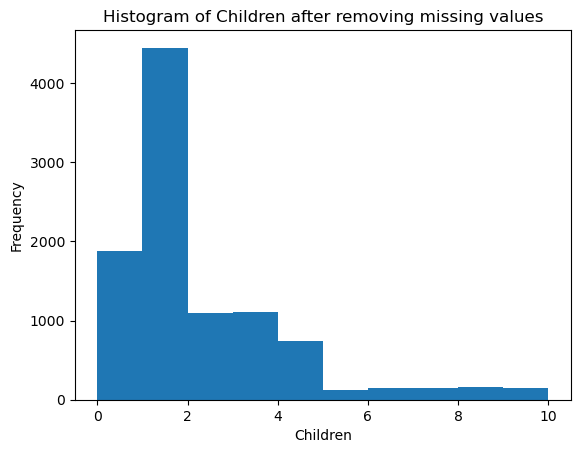

In [17]:
#create a histogram for Children after imputation
plt.hist(df['Children'])
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.title('Histogram of Children after removing missing values')
plt.show()

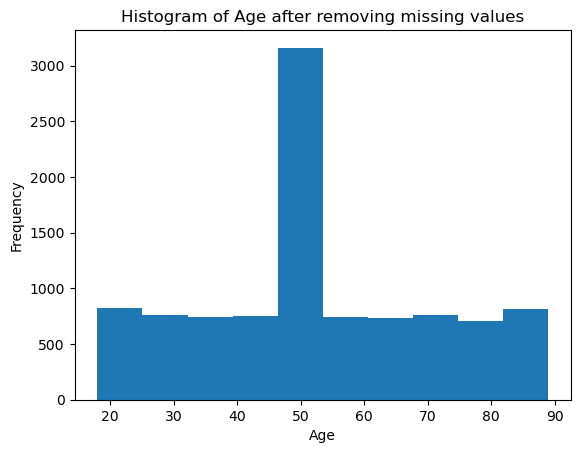

In [18]:
#create a histogram to for Age after imputation
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age after removing missing values')
plt.show()

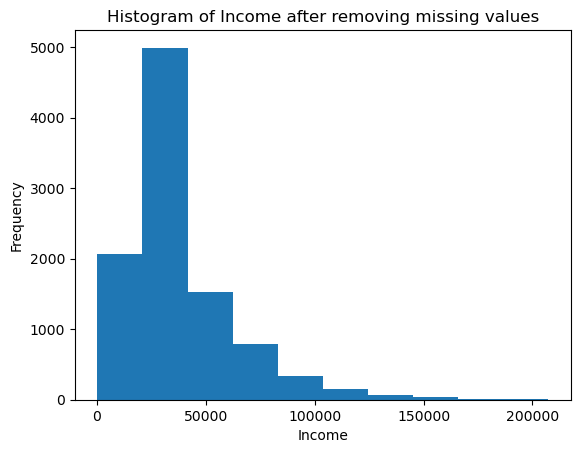

In [19]:
#create a histogram for Income after imputation
plt.hist(df['Income'])
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income after removing missing values')
plt.show()

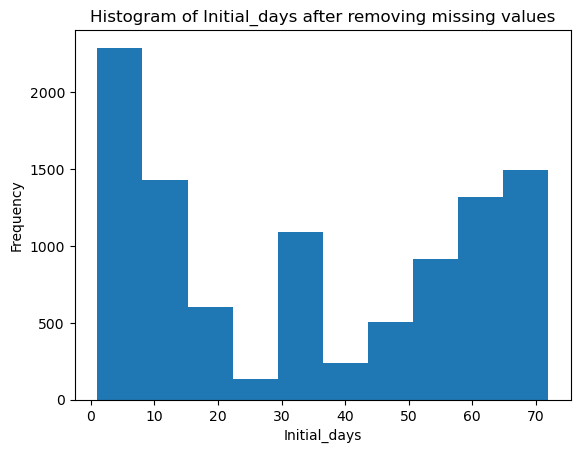

In [20]:
#create a histogram for Initial_days after imputation
plt.hist(df['Initial_days'])
plt.xlabel('Initial_days')
plt.ylabel('Frequency')
plt.title('Histogram of Initial_days after removing missing values')
plt.show()

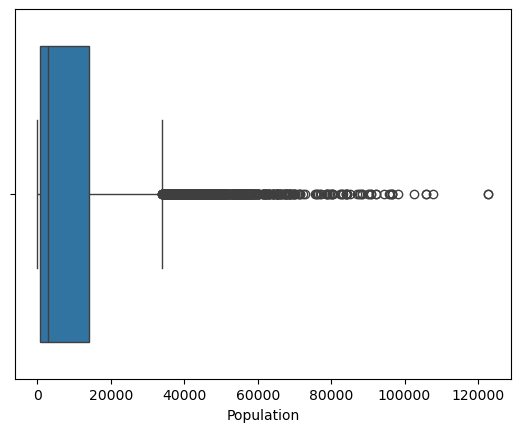

In [21]:
#create a boxplot for Population
import seaborn
boxplot=seaborn.boxplot(x='Population',data=df)

In [22]:
#check the outliers using z-scores for Population
df['Z_Score_Population'] = stats.zscore(df['Population'])
df[['Population','Z_Score_Population']].head()
df_outliers = df.query('(Z_Score_Population > 3) | (Z_Score_Population < -3)')
#number of outliers in Population
print("Number of outliers:", df_outliers.shape[0])
#get the range of outliers in Population
outliers_range = df_outliers['Population'].min(), df_outliers['Population'].max()
#Print the range of outliers in Population
print("Range of outliers for 'Population':", outliers_range)

Number of outliers: 218
Range of outliers for 'Population': (54453, 122814)


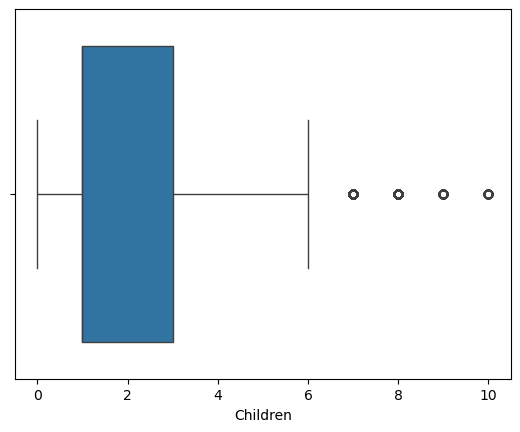

In [23]:
#create a boxplot for Children
boxplot=seaborn.boxplot(x='Children',data=df)

In [24]:
#check the outliers using z-scores in Children
df['Z_Score_Children'] = stats.zscore(df['Children'])
df[['Children','Z_Score_Children']].head()
df_outliers = df.query('(Z_Score_Children > 3) | (Z_Score_Children < -3)')
#number of outliers in Children
print("Number of outliers:", df_outliers.shape[0])
#get the range of outliers in Children
outliers_range = df_outliers['Children'].min(), df_outliers['Children'].max()
#Print the range of outliers in Children
print("Range of outliers for 'Children':", outliers_range)

Number of outliers: 303
Range of outliers for 'Children': (8.0, 10.0)


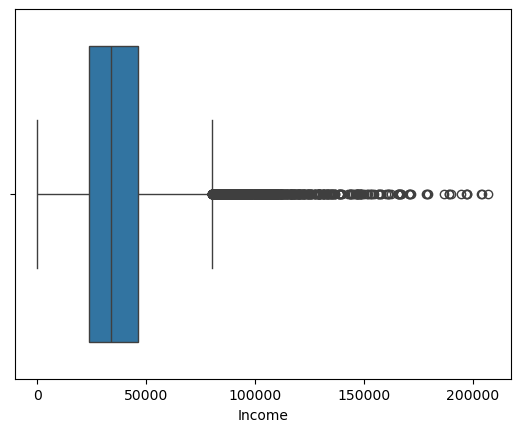

In [25]:
#create a boxplot for Income
boxplot=seaborn.boxplot(x='Income',data=df)

In [26]:
#check the outliers using z-scores in Income
df['Z_Score_Income'] = stats.zscore(df['Income'])
df[['Income','Z_Score_Income']].head()
df_outliers = df.query('(Z_Score_Income > 3) | (Z_Score_Income < -3)')
#number of outliers in Income
print("Number of outliers:", df_outliers.shape[0])
#get the range of outliers in Income
outliers_range = df_outliers['Income'].min(), df_outliers['Income'].max()
#Print the range of outliers in Income
print("Range of outliers for 'Income':", outliers_range)

Number of outliers: 180
Range of outliers for 'Income': (114215.99, 207249.13)


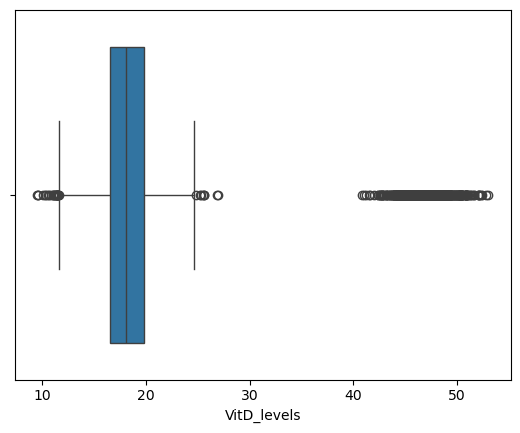

In [27]:
#create a boxplot for VitD_levels
boxplot=seaborn.boxplot(x='VitD_levels',data=df)

In [28]:
#check the outliers using z-scores in VitD_levels
df['Z_Score_VitD_levels'] = stats.zscore(df['VitD_levels'])
df[['VitD_levels','Z_Score_VitD_levels']].head()
df_outliers = df.query('(Z_Score_VitD_levels > 3) | (Z_Score_VitD_levels < -3)')
#number of outliers in VitD_levels
print("Number of outliers:", df_outliers.shape[0])
#get the range of outliers in VitD_levels
outliers_range = df_outliers['VitD_levels'].min(), df_outliers['VitD_levels'].max()
#Print the range of outliers in VitD_levels
print("Range of outliers for 'VitD_levels':", outliers_range)

Number of outliers: 500
Range of outliers for 'VitD_levels': (40.8416712, 53.01912416)


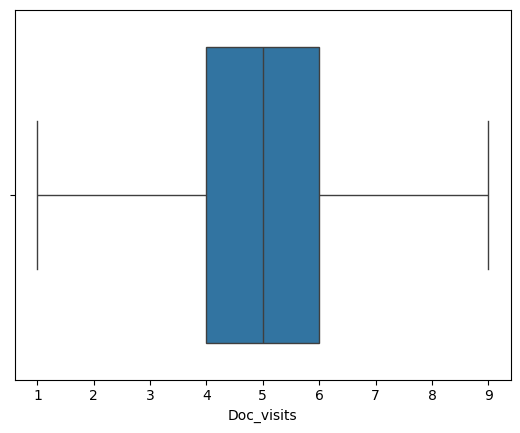

In [29]:
#create a boxplot for Doc_visits
boxplot=seaborn.boxplot(x='Doc_visits',data=df)

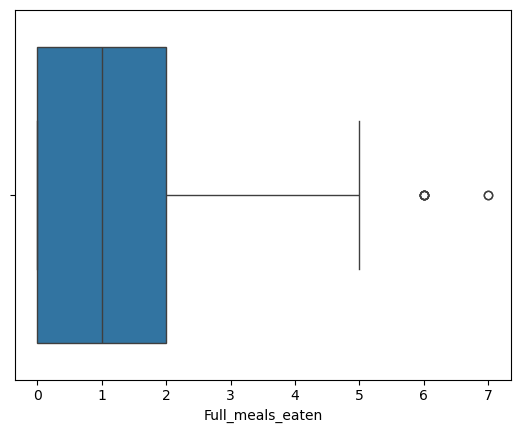

In [30]:
#create a boxplot for Full_meals_eaten
boxplot=seaborn.boxplot(x='Full_meals_eaten',data=df)

In [31]:
#check the outliers using z-scores in Full_meals_eaten
df['Z_Score_Full_meals_eaten'] = stats.zscore(df['Full_meals_eaten'])
df[['Full_meals_eaten','Z_Score_Full_meals_eaten']].head()
df_outliers = df.query('(Z_Score_Full_meals_eaten > 3) | (Z_Score_Full_meals_eaten < -3)')
#number of outliers in Full_meals_eaten
print("Number of outliers:", df_outliers.shape[0])
#get the range of outliers in Full_meals_eaten
outliers_range = df_outliers['Full_meals_eaten'].min(), df_outliers['Full_meals_eaten'].max()
#print the range of outliers in Full_meals_eaten
print("Range of outliers for 'Full_meals_eaten':", outliers_range)

Number of outliers: 33
Range of outliers for 'Full_meals_eaten': (5, 7)


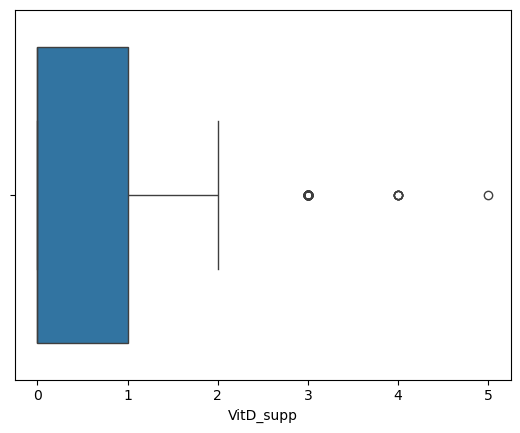

In [32]:
#create a boxplot for VitD_supp
boxplot=seaborn.boxplot(x='VitD_supp',data=df)

In [33]:
#check the outliers using z-scores in VitD_supp
df['Z_Score_VitD_supp'] = stats.zscore(df['VitD_supp'])
df[['VitD_supp','Z_Score_VitD_supp']].head()
df_outliers = df.query('(Z_Score_VitD_supp > 3) | (Z_Score_VitD_supp < -3)')
#number of outliers in VitD_supp
print("Number of outliers:", df_outliers.shape[0])
#get the range of outliers VitD_supp
outliers_range = df_outliers['VitD_supp'].min(), df_outliers['VitD_supp'].max()
#print the range of outliers VitD_supp
print("Range of outliers for 'VitD_supp':", outliers_range)

Number of outliers: 70
Range of outliers for 'VitD_supp': (3, 5)


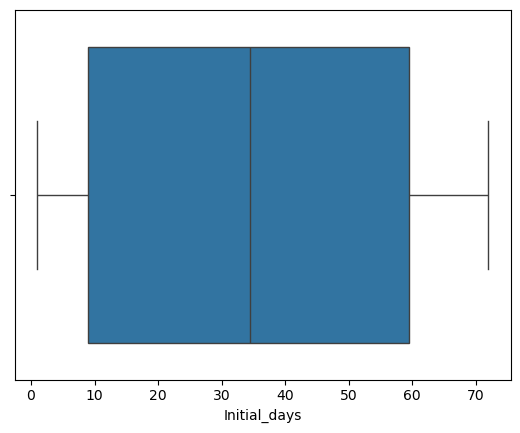

In [34]:
#create a boxplot for Initial_days
boxplot=seaborn.boxplot(x='Initial_days',data=df)

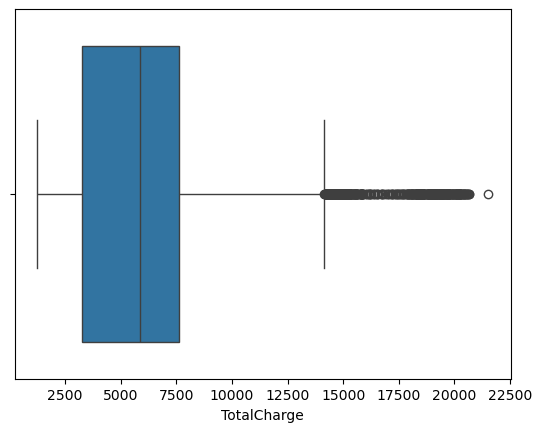

In [35]:
#create a boxplot for TotalCharge
boxplot=seaborn.boxplot(x='TotalCharge',data=df)

In [36]:
#check the outliers using z-scores  in TotalCharge
df['Z_Score_TotalCharge'] = stats.zscore(df['TotalCharge'])
df[['TotalCharge','Z_Score_TotalCharge']].head()
df_outliers = df.query('(Z_Score_TotalCharge > 3) | (Z_Score_TotalCharge < -3)')
#number of outliers in TotalCharge
print("Number of outliers:", df_outliers.shape[0])
#get the range of outliers in TotalCharge
outliers_range = df_outliers['TotalCharge'].min(), df_outliers['TotalCharge'].max()
#print the range of outliers in TotalCharge
print("Range of outliers for 'TotalCharge':", outliers_range)

Number of outliers: 276
Range of outliers for 'TotalCharge': (16053.46288, 21524.22421)


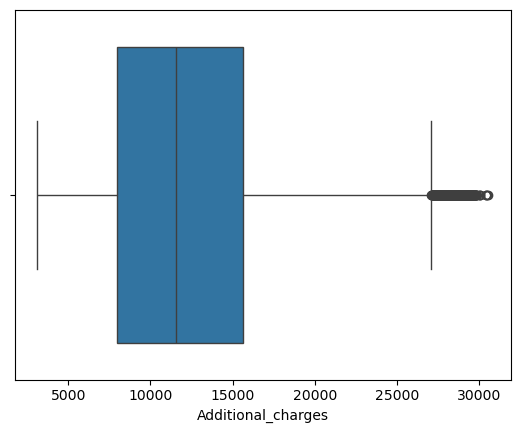

In [37]:
#create a boxplot for Additional_charges
boxplot=seaborn.boxplot(x='Additional_charges',data=df)

In [38]:
#check the outliers using z-scores in Additional_charges
df['Z_Score_Additional_charges'] = stats.zscore(df['Additional_charges'])
df[['Additional_charges','Z_Score_Additional_charges']].head()
df_outliers = df.query('(Z_Score_Additional_charges > 3) | (Z_Score_Additional_charges < -3)')
#number of outliers in Additional_charges
print("Number of outliers:", df_outliers.shape[0])
#get the range of outliers in Additional_charges
outliers_range = df_outliers['Additional_charges'].min(), df_outliers['Additional_charges'].max()
#print the range of outliers in Additional_charges
print("Range of outliers for 'Additional_charges':", outliers_range)

Number of outliers: 0
Range of outliers for 'Additional_charges': (nan, nan)


In [39]:
#check if CaseOrder is unique
df.CaseOrder.value_counts().count()

10000

In [40]:
#check Customer_id is unique (should have 10,000 results)
df.Customer_id.value_counts().count()

10000

In [41]:
#drop Unnamed: 0 
df.drop(columns=['Unnamed: 0'], inplace=True)

In [42]:
#create ordered categorical datatype structure (1=most important, 8=least important)
survey_scores = CategoricalDtype(categories=["8", "7", "6", "5", "4", "3", "2", "1"], ordered=True)
#map int to be strings
df['Item1'] = df['Item1'].map(str)
#created survey_scores datatype 
df['Item1'] = df['Item1'].astype(survey_scores)
#Item2
df['Item2'] = df['Item2'].map(str)
df['Item2'] = df['Item2'].astype(survey_scores)
#Item3
df['Item3'] = df['Item3'].map(str)
df['Item3'] = df['Item3'].astype(survey_scores)
#Item4
df['Item4'] = df['Item4'].map(str)
df['Item4'] = df['Item4'].astype(survey_scores)
#Item5
df['Item5'] = df['Item5'].map(str)
df['Item5'] = df['Item5'].astype(survey_scores)
#Item6
df['Item6'] = df['Item6'].map(str)
df['Item6'] = df['Item6'].astype(survey_scores)
#Item7
df['Item7'] = df['Item7'].map(str)
df['Item7'] = df['Item7'].astype(survey_scores)
#Item8
df['Item8'] = df['Item8'].map(str) 
df['Item8'] = df['Item8'].astype(survey_scores)

In [43]:
#rename columns item1-8 to a logical name
df.rename(columns={'Item1':'Survey_admission',
                   'Item2':'Survey_treatment',
                   'Item3':'Survey_visits',
                   'Item4':'Survey_reliability',
                   'Item5':'Survey_options',
                   'Item6':'Survey_hours',
                   'Item7':'Survey_corteous',
                   'Item8':'Survey_listening'},
          inplace = True)

In [44]:
#round VitD_levels to 3 decimal places
df['VitD_levels'] = df.VitD_levels.round(3)

#round TotalCharge to 2 decimal
df['TotalCharge'] = df.TotalCharge.round(2)

#round Additional_charges
df['Additional_charges'] = df.Additional_charges.round(2)

In [45]:
#see cleaned medical data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   CaseOrder                   10000 non-null  int64   
 1   Customer_id                 10000 non-null  object  
 2   Interaction                 10000 non-null  object  
 3   UID                         10000 non-null  object  
 4   City                        10000 non-null  object  
 5   State                       10000 non-null  object  
 6   County                      10000 non-null  object  
 7   Zip                         10000 non-null  int64   
 8   Lat                         10000 non-null  float64 
 9   Lng                         10000 non-null  float64 
 10  Population                  10000 non-null  int64   
 11  Area                        10000 non-null  object  
 12  Timezone                    10000 non-null  object  
 13  Job              

In [46]:
#extract clean data
df.to_csv('medical_clean_data.csv')

In [47]:
#store continuous quantitative variables for PCA:
##Population, Children, Age, Income, VitD_levels, Doc_visits, Full_meals_eaten,VitD_supp,
##Initial_days, TotalCharge, Additional_charges
df_pca = df[['Population','Children','Age','Income','VitD_levels','Doc_visits','Full_meals_eaten','VitD_supp','Initial_days','TotalCharge','Additional_charges']]

#get normalized data for these variables 
df_pca_normalized = (df_pca-df_pca.mean())/df_pca.std()

#set size of the PCA in with the number of components
pca = PCA(n_components=df_pca.shape[1])

#fit normalized data onto PCA
pca.fit(df_pca_normalized)

#number of components
PCA(n_components= 11)
#print the data within the PCA
pca_printable = pd.DataFrame(pca.transform(df_pca_normalized),columns=['PC1','PC2','PC3','PC4','PC5', 
                                                                'PC6','PC7','PC8','PC9','PC10','PC11'])
#create dataframe for each component
pca_loadings = pd.DataFrame(pca.components_.T, columns = ['PC1','PC2','PC3','PC4','PC5', 
                                                          'PC6','PC7','PC8','PC9','PC10','PC11'],
                            index=df_pca_normalized.columns)

#print the loadings
pca_loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Population,0.020664,-0.027012,0.503295,0.011614,-0.021261,0.545857,0.154997,0.292992,0.580519,-0.010864,-0.001652
Children,0.004321,0.011337,0.143252,-0.055991,0.886954,0.143680,0.277811,-0.246876,-0.175071,-0.009086,-0.002494
Age,0.083045,0.700956,0.022109,-0.024583,-0.014235,0.004055,-0.015253,0.021927,-0.013616,-0.706600,-0.016404
Income,-0.006759,-0.005324,0.153023,0.616420,0.311490,-0.335103,-0.300062,0.544923,-0.013554,-0.007258,-0.001112
VitD_levels,0.540331,-0.052887,-0.291268,0.267676,-0.069784,0.088187,0.467169,0.136053,-0.052285,-0.022963,0.544144
Doc_visits,-0.005252,0.012817,0.175184,0.626188,-0.179332,0.406600,-0.216693,-0.529982,-0.227278,-0.005645,-0.000222
Full_meals_eaten,-0.009220,0.036698,-0.552470,0.164692,0.231966,-0.008978,-0.227848,-0.277332,0.695279,-0.009471,-0.001450
VitD_supp,0.033965,0.010677,0.424356,0.159844,-0.126967,-0.621374,0.382474,-0.390923,0.302893,-0.004898,-0.001479
Initial_days,0.446473,-0.073502,0.316727,-0.315731,0.093099,-0.098157,-0.587240,-0.161877,0.047783,-0.005729,0.451203
TotalCharge,0.702174,-0.078308,-0.023420,0.003262,0.002287,0.005498,-0.016137,0.002556,-0.012084,0.021048,-0.706661


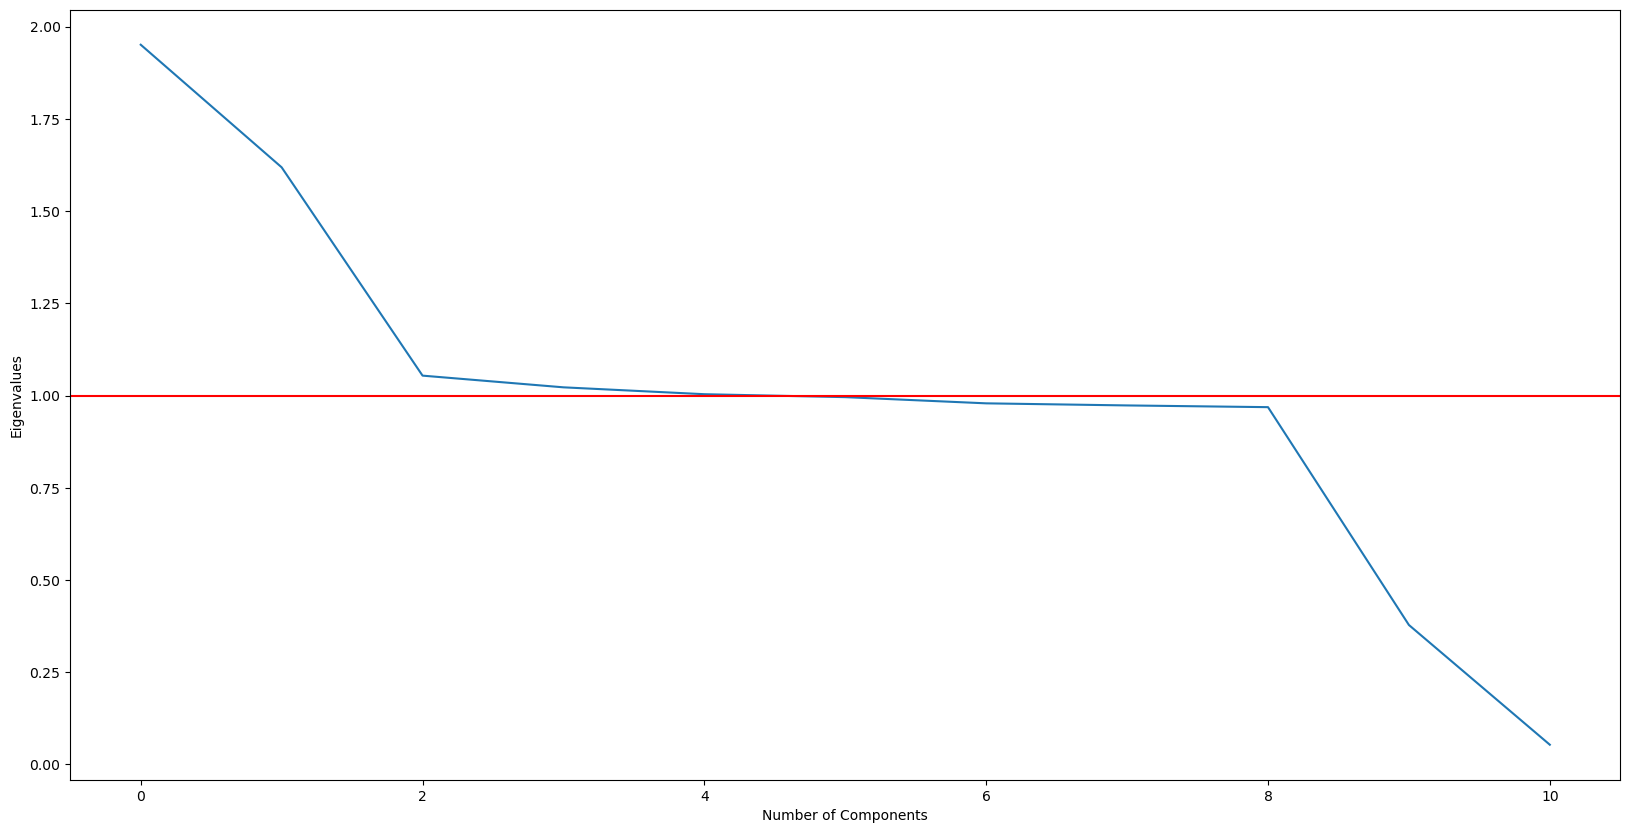

In [48]:
#set the size of the PCA with the number of components
pca = PCA(n_components=df_pca_normalized.shape[1])

#calculate the covariance matrix
cov_matrix = np.dot(df_pca_normalized.T, df_pca_normalized) / df_pca.shape[0]

#fit normalized data onto PCA
pca.fit(df_pca_normalized)

#calculate the eigenvalues
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

#plot the eigenvalues
plt.figure(figsize=[20, 10])
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color="red")
plt.show()

In [49]:
eigenvalues

[1.9511899456775874,
 1.6188379572851532,
 1.0541226001516375,
 1.022418660762991,
 1.003775478769882,
 0.9958246354759674,
 0.9790087857025966,
 0.9733461519710598,
 0.9686663538455165,
 0.37814610434043566,
 0.05356332601723256]